In [1]:
import csv 
import dateutil
import statistics
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#def generator to iterate the data set only once -> SUbscriber
def citibike2gen(filename):
    with open("citibike.csv","r") as fi:
        reader = csv.DictReader(fi)
        for row in reader:
            if row["usertype"] == 'Subscriber':
                birthyear = row["birth_year"]
                if birthyear != "":
                    age = 2015 - int(birthyear)
                    yield age

count = {}
total = 0
for age in citibike2gen('citibike.csv'):
    count[age] = count.get(age,0)+1  

In [3]:
count

{37: 1377,
 22: 470,
 46: 1133,
 30: 1673,
 58: 449,
 36: 1279,
 32: 1793,
 60: 413,
 33: 1455,
 27: 1358,
 24: 922,
 25: 1361,
 38: 1122,
 47: 1010,
 28: 1730,
 35: 1509,
 55: 771,
 29: 1568,
 34: 1499,
 40: 1071,
 42: 1022,
 44: 1162,
 31: 1714,
 20: 256,
 21: 392,
 49: 863,
 43: 1081,
 51: 891,
 61: 417,
 23: 493,
 26: 1322,
 45: 1347,
 54: 618,
 41: 1158,
 39: 1168,
 56: 687,
 50: 947,
 57: 783,
 48: 999,
 52: 970,
 66: 134,
 63: 247,
 70: 28,
 67: 149,
 18: 94,
 19: 124,
 53: 899,
 65: 150,
 71: 59,
 62: 346,
 59: 488,
 64: 229,
 74: 39,
 77: 24,
 81: 8,
 68: 74,
 73: 61,
 75: 21,
 72: 18,
 69: 93,
 17: 59,
 115: 22,
 16: 17,
 80: 9,
 76: 4,
 105: 2,
 89: 1,
 86: 1,
 114: 1,
 93: 4}

In [4]:
age_dict = {k: v for k, v in sorted(count.items(), key=lambda item: item[0])}
age_dict

{16: 17,
 17: 59,
 18: 94,
 19: 124,
 20: 256,
 21: 392,
 22: 470,
 23: 493,
 24: 922,
 25: 1361,
 26: 1322,
 27: 1358,
 28: 1730,
 29: 1568,
 30: 1673,
 31: 1714,
 32: 1793,
 33: 1455,
 34: 1499,
 35: 1509,
 36: 1279,
 37: 1377,
 38: 1122,
 39: 1168,
 40: 1071,
 41: 1158,
 42: 1022,
 43: 1081,
 44: 1162,
 45: 1347,
 46: 1133,
 47: 1010,
 48: 999,
 49: 863,
 50: 947,
 51: 891,
 52: 970,
 53: 899,
 54: 618,
 55: 771,
 56: 687,
 57: 783,
 58: 449,
 59: 488,
 60: 413,
 61: 417,
 62: 346,
 63: 247,
 64: 229,
 65: 150,
 66: 134,
 67: 149,
 68: 74,
 69: 93,
 70: 28,
 71: 59,
 72: 18,
 73: 61,
 74: 39,
 75: 21,
 76: 4,
 77: 24,
 80: 9,
 81: 8,
 86: 1,
 89: 1,
 93: 4,
 105: 2,
 114: 1,
 115: 22}

## Median age calculation

In [5]:
total = sum(age_dict.values())
total

45658

In [6]:
median_age = 0
age_agg = 0

for age_val,freq in age_dict.items():
    age_agg = age_agg + freq
    if age_agg * 2 > total:
        median_age = age_val
        break

In [7]:
print("The median age of the subscriber customers is:-",median_age)

The median age of the subscriber customers is:- 38


In [8]:
age_df = pd.DataFrame(age_dict.items(),columns=['Age','Frequency'])
age_df

,Age,Frequency
0,16,17
1,17,59
2,18,94
3,19,124
4,20,256
...,...,...
65,89,1
66,93,4
67,105,2
68,114,1


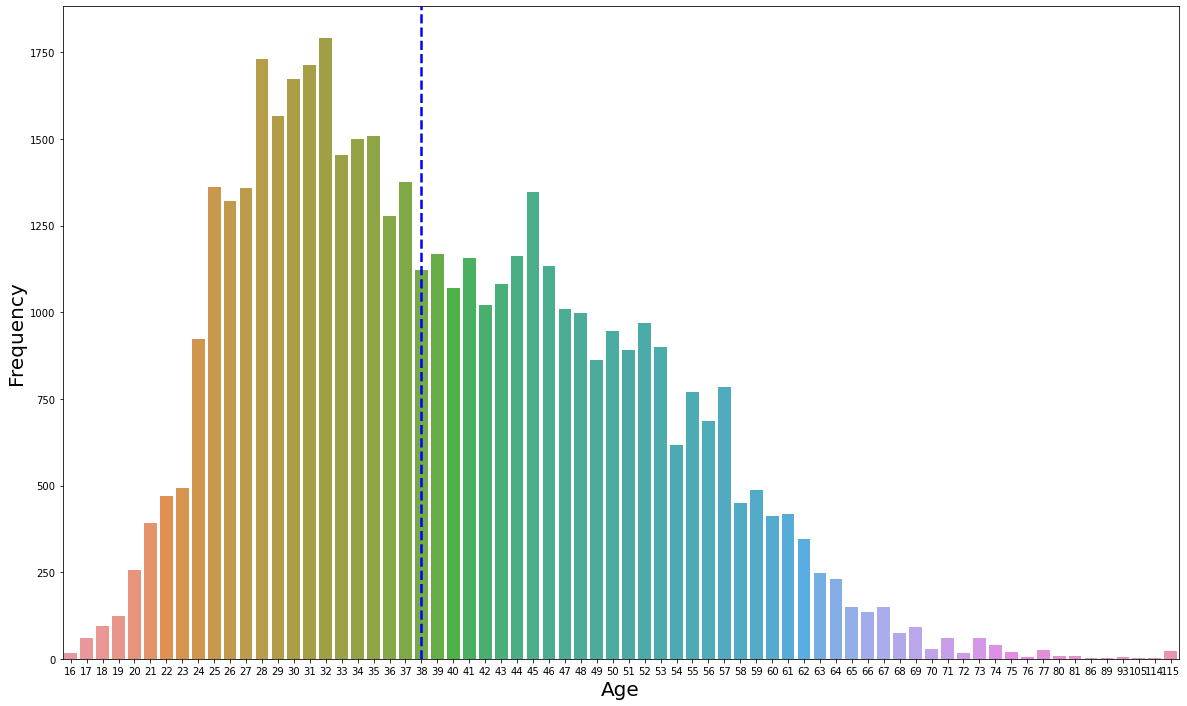

In [9]:
plt.figure(figsize=(20,12))
plt.xlabel('Age',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
ax = sns.barplot(x = "Age",y="Frequency",data = age_df, ci = None)
ax.axvline(x=22,
            color='blue',
            ls='--', 
            lw=2.5)

In [10]:
median_age

38